<a href="https://colab.research.google.com/github/BbangB/Code/blob/main/CNN_Logo_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import tensorflow as tf
tf.__version__

'2.6.0'

In [ ]:
print('GPU Information -', tf.test.gpu_device_name(), '\n')
!nvidia-smi

GPU Information - /device:GPU:0 

Wed Sep  1 07:18:16 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.57.02    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P0    71W / 149W |    121MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                      

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls -l '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'

-rw------- 1 root root 12929865 Apr  1 00:08 '/content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip'


In [4]:
!unzip /content/drive/My\ Drive/Colab\ Notebooks/datasets/Logo_Data.zip

Archive:  /content/drive/My Drive/Colab Notebooks/datasets/Logo_Data.zip
  inflating: test/Adidas/4606245138.jpg  
 extracting: test/Adidas/Adidas_17.png  
 extracting: test/Adidas/Adidas_18.png  
 extracting: test/Adidas/Adidas_20.png  
 extracting: test/Adidas/Adidas_4.png  
 extracting: test/Adidas/Adidas_6.png  
 extracting: test/Adidas/Adidas_7.png  
  inflating: test/Apple/4748791597.jpg  
  inflating: test/Apple/Apple_10.jpg  
 extracting: test/Apple/Apple_12.png  
 extracting: test/Apple/Apple_14.png  
 extracting: test/Apple/Apple_16.png  
 extracting: test/Apple/Apple_18.png  
 extracting: test/Apple/Apple_20.png  
  inflating: test/BMW/3744679341.jpg  
  inflating: test/BMW/BMW_11.jpg     
  inflating: test/BMW/BMW_14.jpg     
  inflating: test/BMW/BMW_17.jpg     
  inflating: test/BMW/BMW_8.jpg      
  inflating: test/Citroen/2588612032.jpg  
  inflating: test/Citroen/Citroen_1.jpg  
  inflating: test/Citroen/Citroen_11.jpg  
 extracting: test/Citroen/Citroen_15.png  
 extr

In [42]:
!ls -l

total 16
drwx------  6 root root 4096 Sep  1 08:11 drive
drwxr-xr-x  1 root root 4096 Aug 25 13:35 sample_data
drwxr-xr-x 29 root root 4096 Sep  1 08:12 test
drwxr-xr-x 29 root root 4096 Sep  1 08:12 train


In [43]:
train_dir = 'train'
valid_dir = 'test'
test_dir = 'test'

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale =1./255)
valid_datagen = ImageDataGenerator(rescale =1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (75, 75),
                                                    batch_size = 8,
                                                    class_mode = 'categorical'
                                                    )
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (75, 75),
                                                    batch_size = 8,
                                                    class_mode = 'categorical'
                                                    )

Found 498 images belonging to 27 classes.
Found 177 images belonging to 27 classes.


In [46]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 데이터 크기:', labels_batch.shape)
    break

배치 데이터 크기: (8, 75, 75, 3)
배치 데이터 크기: (8, 27)


In [54]:
labels_batch

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

In [58]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3), activation= 'relu', input_shape = (75,75,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3), activation= 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3), activation= 'relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(32,(3,3), activation= 'relu'))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(27,activation= 'softmax'))

In [59]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 73, 73, 32)        896       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 15, 15, 32)        9248      
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 5, 5, 32)         

In [60]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])


In [61]:
%%time

T_model = model.fit(train_generator, steps_per_epoch= 5,
                    epochs = 60,
                    validation_data = valid_generator,
                    validation_steps = 50)


Epoch 1/60
5/5 [==============================] - 3s 159ms/step - loss: 3.3009 - accuracy: 0.1000 - val_loss: 3.3421 - val_accuracy: 0.0395
Epoch 2/60
5/5 [==============================] - 0s 18ms/step - loss: 3.3341 - accuracy: 0.0500
Epoch 3/60
5/5 [==============================] - 0s 21ms/step - loss: 3.2734 - accuracy: 0.0500
Epoch 4/60
5/5 [==============================] - 0s 21ms/step - loss: 3.3141 - accuracy: 0.0750
Epoch 5/60
5/5 [==============================] - 0s 18ms/step - loss: 3.2829 - accuracy: 0.1000
Epoch 6/60
5/5 [==============================] - 0s 21ms/step - loss: 3.2881 - accuracy: 0.0750
Epoch 7/60
5/5 [==============================] - 0s 25ms/step - loss: 3.2731 - accuracy: 0.1250
Epoch 8/60
5/5 [==============================] - 0s 20ms/step - loss: 3.1630 - accuracy: 0.0750
Epoch 9/60
5/5 [==============================] - 0s 15ms/step - loss: 3.2269 - accuracy: 0.1000
Epoch 10/60
5/5 [==============================] - 0s 20ms/step - loss: 3.2379 - acc

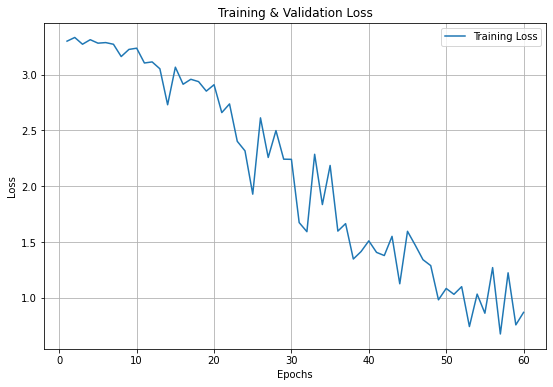

In [63]:
import matplotlib.pyplot as plt
epochs = range(1, len(T_model.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, T_model.history['loss'])
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss'])
plt.grid()
plt.show()

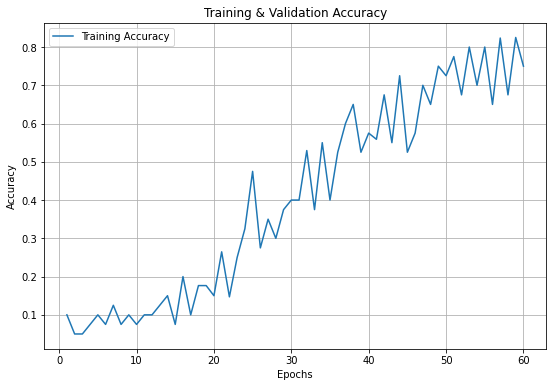

In [65]:
import matplotlib.pyplot as plt
epochs = range(1, len(T_model.history['loss']) + 1)
plt.figure(figsize = (9, 6))
plt.plot(epochs, T_model.history['accuracy'])
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy'])
plt.grid()
plt.show()

In [69]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  target_size = (75,75),
                                                  batch_size = 20,
                                                  class_mode = 'categorical')


Found 177 images belonging to 27 classes.


In [71]:
loss , accuracy = model.evaluate(test_generator,
                                 steps =50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 0s 5ms/step - loss: 2.0802 - accuracy: 0.5424
Loss = 2.08015
Accuracy = 0.54237


In [74]:
model.save('/content/drive/My Drive/Colab Notebooks/models/logo.h5')

In [75]:
!ls -l /content/drive/My\ Drive/Colab\ Notebooks/models

total 10760
-rw------- 1 root root   34600 Aug 30 07:55 001_Model_iris.h5
-rw------- 1 root root 5491352 Sep  1 08:40 002_dogs_and_cats_small.h5
-rw------- 1 root root 5491352 Sep  1 08:40 logo.h5


In [76]:
from tensorflow.keras.models import load_model
model_small = load_model('/content/drive/My Drive/Colab Notebooks/models/logo.h5')

In [77]:
loss, accuracy = model_small.evaluate(test_generator,
steps = 50)
print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 0s 5ms/step - loss: 2.0802 - accuracy: 0.5424
Loss = 2.08015
Accuracy = 0.54237
